In [1]:
# FIFA 2021 Data  Visualization and Analysis using Python


In [2]:
##  Importing Libraries and Data Exploration

In [3]:
# Data Analaysis Libraries 
import numpy as np
import pandas as pd

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.express as px


In [4]:
pd.options.display.max_rows = 4000
df = pd.read_csv(r'/home/yassine/Downloads/archive/fifa.csv',index_col=0)

In [5]:
print("----------Shape of Data----------")
print(df.shape)

# rows and cells
r,c =df.shape
print("Number of Rows in the dataset: ",r)
print("Number of Cols in the dataset: ",c)

----------Shape of Data----------
(18207, 88)
Number of Rows in the dataset:  18207
Number of Cols in the dataset:  88


In [6]:
 print("----------Top-5- Record----------")
df.head(5)

----------Top-5- Record----------


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
print("-----------Information-----------")
df.info()

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            1

In [8]:
print("-----------Data Types-----------")
print(df.dtypes)

-----------Data Types-----------
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       ob

In [9]:
## Data Cleaning and Preprocessing

In [10]:
#Dropping unnecessary Columns  

df.drop(['ID','Photo','Flag','Club Logo','Real Face','Loaned From'],
          axis=1,inplace=True)

In [11]:
#Missing Data

df.isna().sum().sort_values(ascending=False)

RWB                         2085
CF                          2085
LW                          2085
RS                          2085
ST                          2085
LS                          2085
RF                          2085
RW                          2085
LAM                         2085
CAM                         2085
RAM                         2085
LM                          2085
LCM                         2085
CM                          2085
RCM                         2085
RM                          2085
LWB                         2085
LDM                         2085
CDM                         2085
RDM                         2085
LB                          2085
LCB                         2085
CB                          2085
RCB                         2085
RB                          2085
LF                          2085
Release Clause              1564
Joined                      1553
Contract Valid Until         289
Club                         241
Jersey Num

In [12]:
# Cleaning columns
df['Weight']=df['Weight'].str.replace('lbs','')
df['Height']=df['Height'].str.replace("'",'.')

# Changing datatypes from Object to float
df.Height = df.Height.astype(float)
df.Weight = df.Weight.astype(float)
df['Height'].fillna((df['Height'].mean()), inplace = True)
df['Weight'].fillna((df['Weight'].mean()), inplace = True) 

In [13]:
#Replacing missing data with mean foot the Numerical Features

df['International Reputation'].fillna(df['International Reputation'].mean(), inplace = True) 
df['Skill Moves'].fillna(df['Skill Moves'].mean(), inplace = True)
df['Weak Foot'].fillna(df['Weak Foot'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True) 
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(), inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['Acceleration'].fillna(df['Acceleration'].mean(), inplace = True)
df['SprintSpeed'].fillna(df['SprintSpeed'].mean(), inplace = True)
df['Agility'].fillna(df['Agility'].mean(), inplace = True)
df['Reactions'].fillna(df['Reactions'].mean(), inplace = True)
df['Balance'].fillna(df['Balance'].mean(), inplace = True)
df['ShotPower'].fillna(df['ShotPower'].mean(), inplace = True)
df['Jumping'].fillna(df['Jumping'].mean(), inplace = True)
df['Stamina'].fillna(df['Stamina'].mean(), inplace = True)
df['Strength'].fillna(df['Strength'].mean(), inplace = True)
df['LongShots'].fillna(df['LongShots'].mean(), inplace = True)
df['Aggression'].fillna(df['Aggression'].mean(), inplace = True)
df['Interceptions'].fillna(df['Interceptions'].mean(), inplace = True)
df['Positioning'].fillna(df['Positioning'].mean(), inplace = True)
df['Vision'].fillna(df['Vision'].mean(), inplace = True)
df['Penalties'].fillna(df['Penalties'].mean(), inplace = True)
df['Composure'].fillna(df['Composure'].mean(), inplace = True)
df['Marking'].fillna(df['Marking'].mean(), inplace = True)
df['StandingTackle'].fillna(df['StandingTackle'].mean(), inplace = True)
df['SlidingTackle'].fillna(df['SlidingTackle'].mean(), inplace = True)
df['GKDiving'].fillna(df['GKDiving'].mean(), inplace = True)
df['GKHandling'].fillna(df['GKHandling'].mean(), inplace = True)
df['GKKicking'].fillna(df['GKKicking'].mean(), inplace = True)
df['GKPositioning'].fillna(df['GKPositioning'].mean(), inplace = True)
df['GKReflexes'].fillna(df['GKReflexes'].mean(), inplace = True)

In [14]:
#test and checking the data
df.isna().sum().sort_values(ascending=False)

RWB                         2085
CF                          2085
LW                          2085
RS                          2085
ST                          2085
LS                          2085
RF                          2085
RW                          2085
LAM                         2085
CAM                         2085
RAM                         2085
LM                          2085
LCM                         2085
CM                          2085
RCM                         2085
RM                          2085
LWB                         2085
LDM                         2085
CDM                         2085
RDM                         2085
LB                          2085
LCB                         2085
CB                          2085
RCB                         2085
RB                          2085
LF                          2085
Release Clause              1564
Joined                      1553
Contract Valid Until         289
Club                         241
Jersey Num

In [15]:
#Skill Columns

#Function to convert skill rating at each position.
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val

skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

for col in skill_columns:
    df[col] = df[col].apply(skillConverter)
    df[col].fillna(0.0, inplace = True)

In [16]:
df.isna().sum().sort_values(ascending=False)

Release Clause              1564
Joined                      1553
Contract Valid Until         289
Club                         241
Jersey Number                 60
Position                      60
Preferred Foot                48
Body Type                     48
Work Rate                     48
Dribbling                      0
Crossing                       0
Balance                        0
Reactions                      0
Agility                        0
SprintSpeed                    0
Acceleration                   0
BallControl                    0
Finishing                      0
Curve                          0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Jumping                        0
LongPassing                    0
FKAccuracy                     0
ShotPower                      0
Interceptions                  0
Stamina                        0
Strength                       0
GKReflexes                     0
GKPosition

In [17]:
df['Value'].head(5)


0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
Name: Value, dtype: object

In [18]:
df['Wage'].head(5)


0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

In [19]:
df['Release Clause'].head(5)

0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object

In [20]:
# Value, Wage and Release Clause Conversion
def value_and_wage_conversion(Value):
    if isinstance(Value,str):
        out = Value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in Value:
            out = float(out.replace('K', ''))*1000
        return float(out)


df['Value'] = df['Value'].apply(lambda x: value_and_wage_conversion(x))
df['Wage'] = df['Wage'].apply(lambda x: value_and_wage_conversion(x))
df['Release Clause'] = df['Release Clause'].apply(lambda x: value_and_wage_conversion(x))


In [21]:
#testing for the wage column
df['Wage'].head(5)


0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

In [22]:
#testing for the wage column
df['Value'].head(5)


0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

In [23]:
#testing for the Release clause column
df['Release Clause'].head(5)

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64

In [24]:
#Categorical Columns
df['Club'].fillna('No Club', inplace = True)
df['Position'].fillna('unknown',inplace=True)

In [25]:
#Contract Valid Until Column
import datetime
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])
df['year'] = pd.DatetimeIndex(df['Contract Valid Until']).year.astype(str)
df['Contract Valid Until'].fillna('Not available', inplace = True) 

In [26]:
#Work Rate Column
df['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

In [27]:
#RELPACING MISSING DATA FOR THE WORK RATE

df['Work Rate'].fillna('Medium/ Medium', inplace = True)


In [28]:
#RELPACING MISSING DATA Preferred Foot

df['Preferred Foot'].fillna('Right', inplace = True)


In [29]:
#Body Type Column
df['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: Body Type, dtype: int64

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

df['Body Type'][df['Body Type'] == 'Messi'] = 'Lean'
df['Body Type'][df['Body Type'] == 'C. Ronaldo'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Neymar'] ='Lean'
df['Body Type'][df['Body Type'] == 'Courtois'] = 'Lean'

#PLAYER_BODY_TYPE_25 is Normal body type
df['Body Type'][df['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Shaqiri'] = 'Stocky'
df['Body Type'][df['Body Type'] == 'Akinfenwa'] = 'Stocky'
df['Body Type'].fillna('Normal', inplace = True)

In [31]:
#Body Type Column TO TEST
df['Body Type'].value_counts()

Normal    10645
Lean       6420
Stocky     1142
Name: Body Type, dtype: int64

In [32]:
#fINALL TEST ALL COLUMNS SHOULD BE FALSE
df.isnull().any()

Name                        False
Age                         False
Nationality                 False
Overall                     False
Potential                   False
Club                        False
Value                       False
Wage                        False
Special                     False
Preferred Foot              False
International Reputation    False
Weak Foot                   False
Skill Moves                 False
Work Rate                   False
Body Type                   False
Position                    False
Jersey Number                True
Joined                       True
Contract Valid Until        False
Height                      False
Weight                      False
LS                          False
ST                          False
RS                          False
LW                          False
LF                          False
CF                          False
RF                          False
RW                          False
LAM           

In [33]:
## Exploratory Data Analysis

In [34]:
###AGE Analysis

In [82]:
# The five eldest players
eldest = df.sort_values('Age', ascending = False)[['Name', 'Nationality', 'Age']].head(5)
eldest.set_index('Name', inplace=True)
print('The five eldest players\n')

print(eldest)

The five eldest players

                     Nationality  Age
Name                                 
O. Pérez                  Mexico   45
K. Pilkington            England   44
T. Warner      Trinidad & Tobago   44
S. Narazaki                Japan   42
C. Muñoz               Argentina   41


In [81]:
# The five youngest players
eldest = df.sort_values('Age', ascending = True)[['Name', 'Nationality', 'Age']].head(5)
eldest.set_index('Name', inplace=True)
print('The five youngest players\n')
print(eldest)

The five youngest players

            Nationality  Age
Name                        
G. Nugent       England   16
J. Olstad        Norway   16
H. Massengo      France   16
J. Italiano   Australia   16
N. Ayéva         Sweden   16


In [37]:
# The oldest team
df.groupby(['Club'])['Age'].sum().sort_values(ascending = False).head(5)

Club
No Club          6364
Cardiff City      863
Villarreal CF     851
Burnley           850
Frosinone         843
Name: Age, dtype: int64

In [38]:
# The youngest team
df.groupby(['Club'])['Age'].sum().sort_values(ascending = True).head(5)

Club
Derry City      398
Sligo Rovers    421
Limerick FC     436
Tromsø IL       476
FK Haugesund    508
Name: Age, dtype: int64

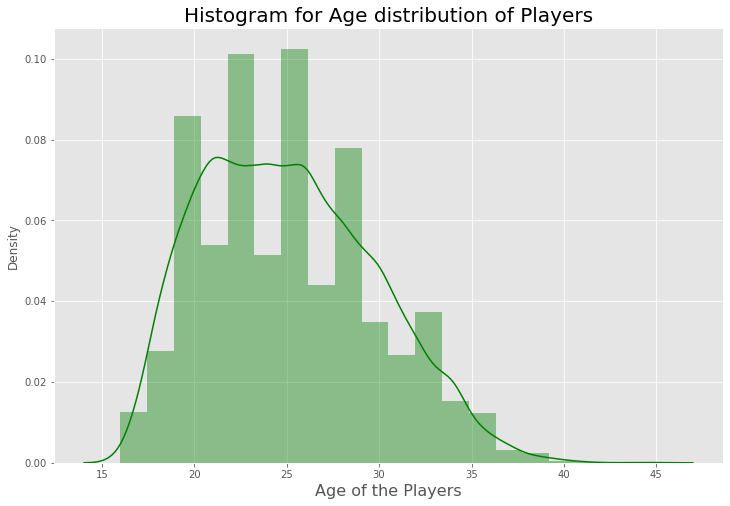

In [39]:
x = df['Age']
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 20, kde = True, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Histogram for Age distribution of Players', fontsize = 20)
plt.show()

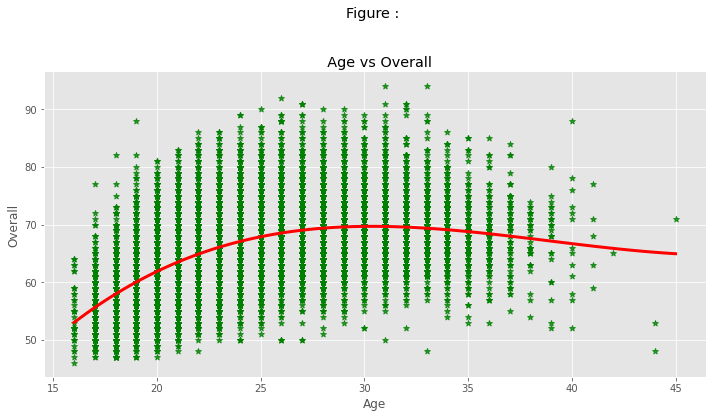

In [40]:
# Age vs Overall

sns.lmplot(x="Age", y="Overall",data=df,markers="*",
           order=3, ci=None, scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);

plt.title("Figure : \n\n\n  Age vs Overall");
plt.show()

Text(0.5, 1.0, 'Age & Overall Distribution')

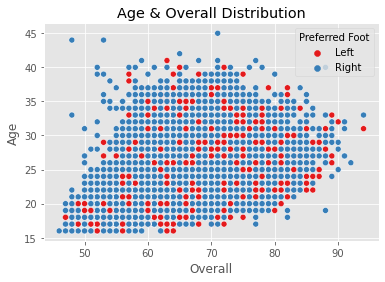

In [41]:
sns.scatterplot(x="Overall", y="Age", hue="Preferred Foot", data=df, palette="Set1").set_title("Age & Overall Distribution")

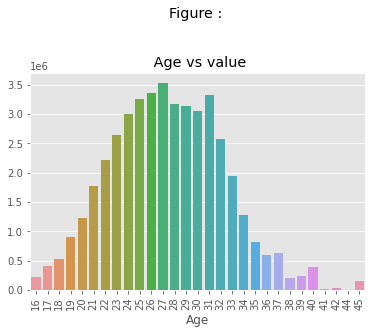

In [42]:
#Age and wage

mean_value_per_age = df.groupby('Age')['Value'].mean()
p = sns.barplot(x = mean_value_per_age.index, y = mean_value_per_age.values)
p = plt.xticks(rotation=90)
plt.title("Figure : \n\n\n Age vs value");

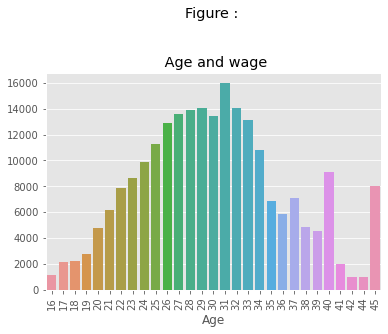

In [43]:
#Age and wage
mean_wage_per_age = df.groupby('Age')['Wage'].mean()
p = sns.barplot(x = mean_wage_per_age.index, y = mean_wage_per_age.values)
ax.set_title(label = 'age and wage', fontsize = 20)
p = plt.xticks(rotation=90)
plt.title("Figure : \n\n\n Age and wage");

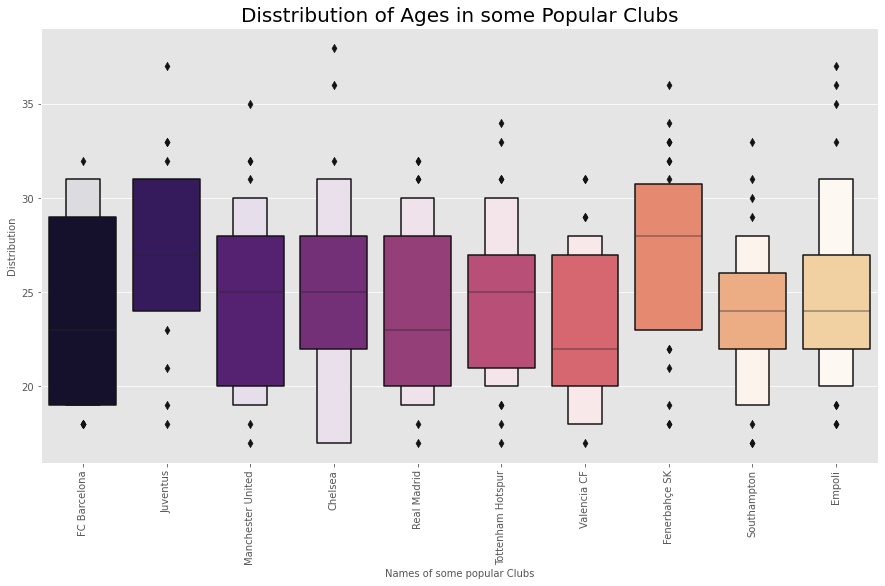

In [44]:
# Distribution of Ages in some Popular clubs

some_clubs = ('Fenerbahçe SK', 'Southampton', 'Juventus', 'Empoli', 'Manchester United', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

df_club = df.loc[df['Club'].isin(some_clubs) & df['Wage']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = df_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

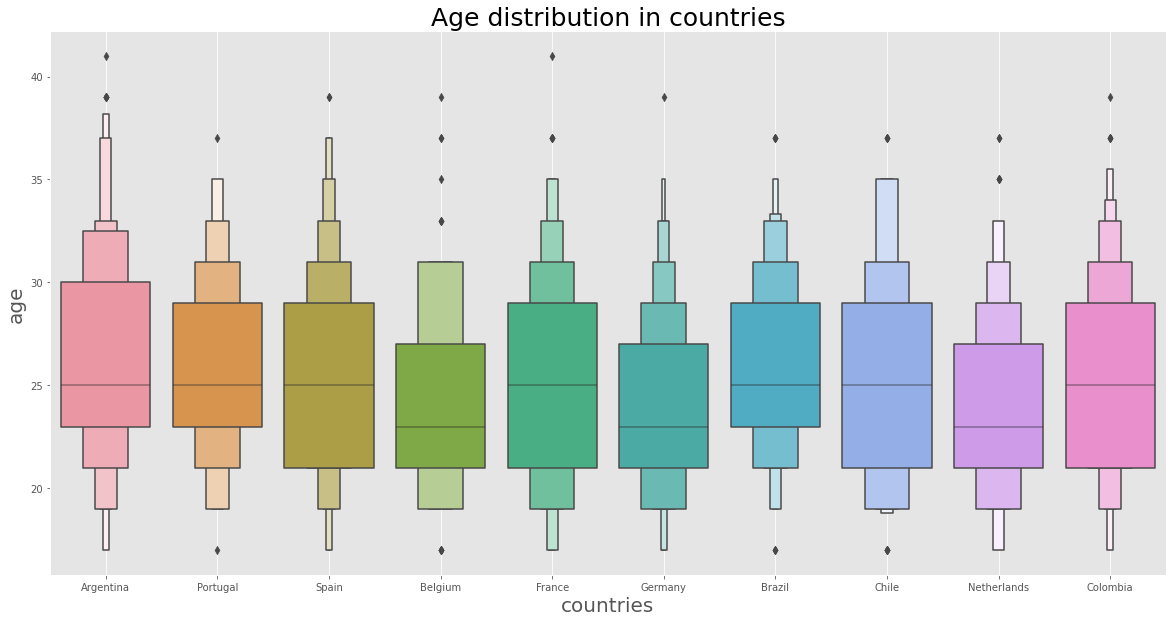

In [45]:
countries_names = ('France', 'Brazil', 'Germany', 'Belgium', 'Spain', 'Netherlands', 'Argentina', 'Portugal', 'Chile', 'Colombia')
countries = df.loc[df['Nationality'].isin(countries_names) & df['Age']]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxenplot(x="Nationality", y="Age", data=countries)
ax.set_title(label='Age distribution in countries', fontsize=25)
plt.xlabel('countries', fontsize=20)
plt.ylabel('age', fontsize=20)
plt.grid()

In [46]:
###players rating/positions/attributes Analysis

In [47]:
###Top 10 player of FIFA 19 based on rating'''

df[df['Overall'] > 90][['Name', 'Age', 'Club', 'Nationality']]

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain


In [48]:
### fastest players

df.sort_values(by = 'SprintSpeed' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','SprintSpeed']].head()

,Name,Club,Nationality,Overall,Age,SprintSpeed
55,L. Sané,Manchester City,Germany,86,22,96.0
25,K. Mbappé,Paris Saint-Germain,France,88,19,96.0
1968,Adama,Wolverhampton Wanderers,Spain,75,22,96.0
36,G. Bale,Real Madrid,Wales,88,28,95.0
10928,Maicon,Livorno,Brazil,65,25,95.0


In [49]:
### Best Finisher

df.sort_values(by = 'Finishing' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Finishing']].head()

,Name,Club,Nationality,Overall,Age,Finishing
0,L. Messi,FC Barcelona,Argentina,94,31,95.0
16,H. Kane,Tottenham Hotspur,England,89,24,94.0
1,Cristiano Ronaldo,Juventus,Portugal,94,33,94.0
7,L. Suárez,FC Barcelona,Uruguay,91,31,93.0
23,S. Agüero,Manchester City,Argentina,89,30,93.0


In [50]:
#### Best dribbler
df.sort_values(by = 'Dribbling' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Dribbling']].head()


,Name,Club,Nationality,Overall,Age,Dribbling
0,L. Messi,FC Barcelona,Argentina,94,31,97.0
2,Neymar Jr,Paris Saint-Germain,Brazil,92,26,96.0
5,E. Hazard,Chelsea,Belgium,91,27,95.0
30,Isco,Real Madrid,Spain,88,26,94.0
94,Y. Brahimi,FC Porto,Algeria,85,28,93.0


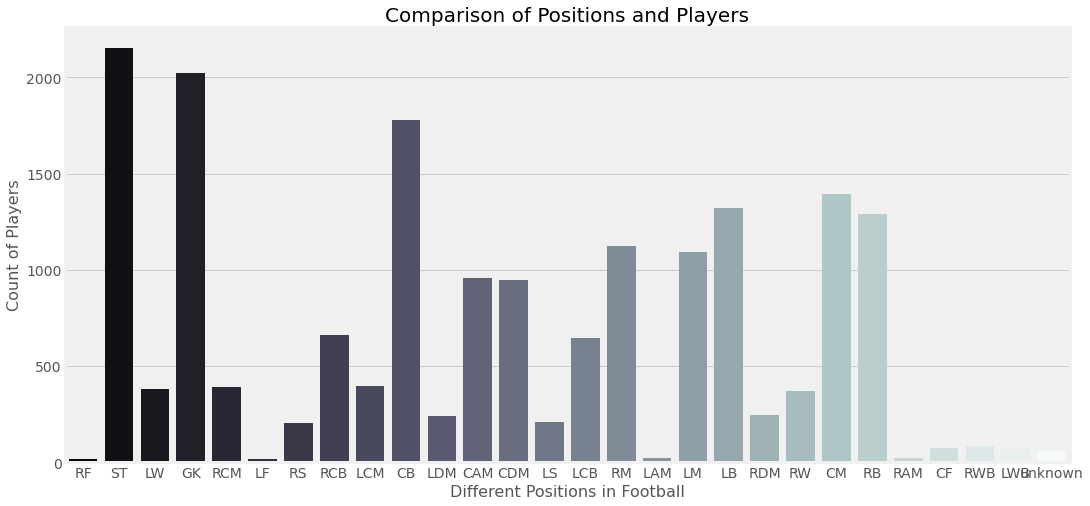

In [51]:
# different positions acquired by the players 

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = df, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

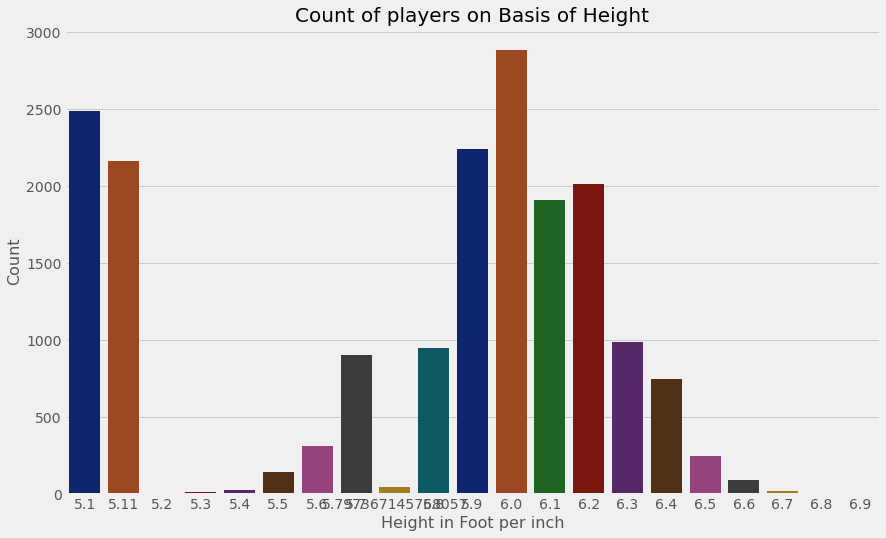

In [52]:
###Count of players on Basis of Height
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = df, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

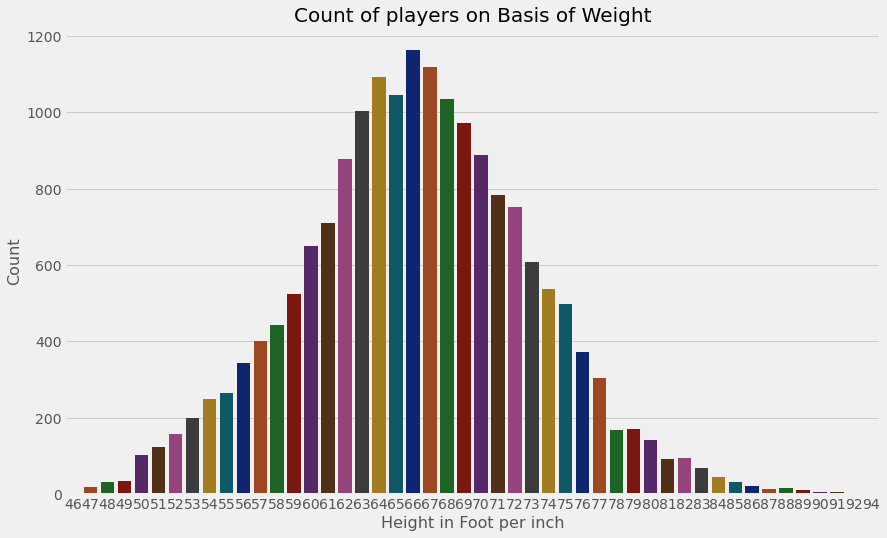

In [53]:
###Count of players on Basis of Height
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Overall', data = df, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Weight', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

<AxesSubplot:title={'center':'Weight vs Dribbling'}, xlabel='Weight', ylabel='Dribbling'>

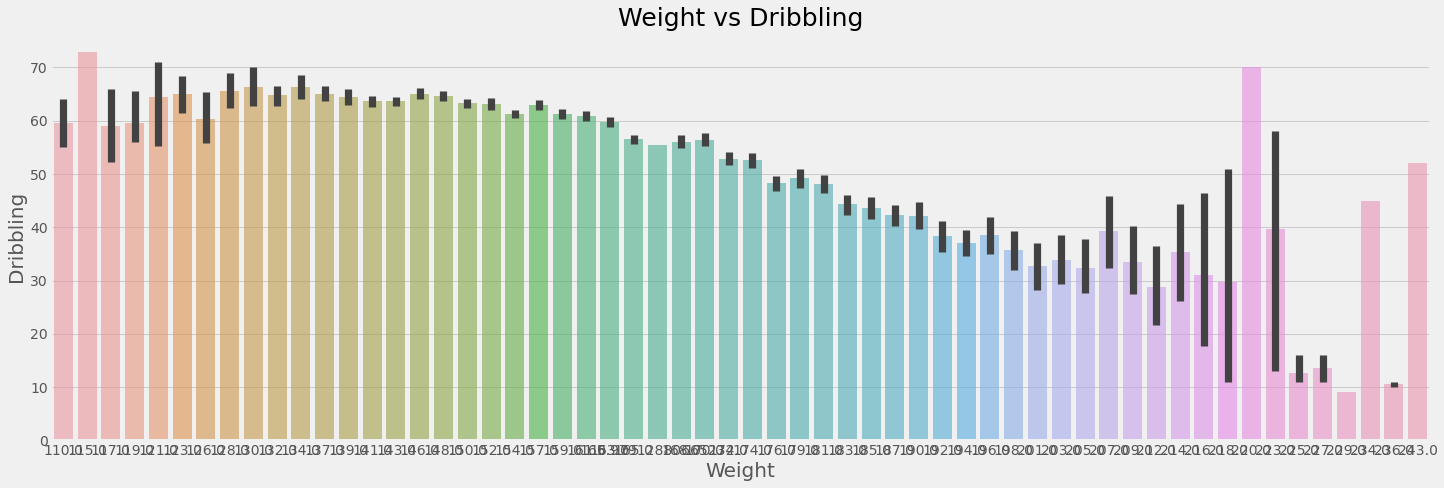

In [54]:
###Weight vs Dribbling
plt.figure(figsize = (22, 7))
plt.xlabel('Weight_kg', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Weight vs Dribbling', fontsize = 25)
sns.barplot(x='Weight', y='Dribbling', data=df.sort_values('Weight'),alpha=0.6)

<AxesSubplot:title={'center':'Height vs Dribbling'}, xlabel='Height', ylabel='Dribbling'>

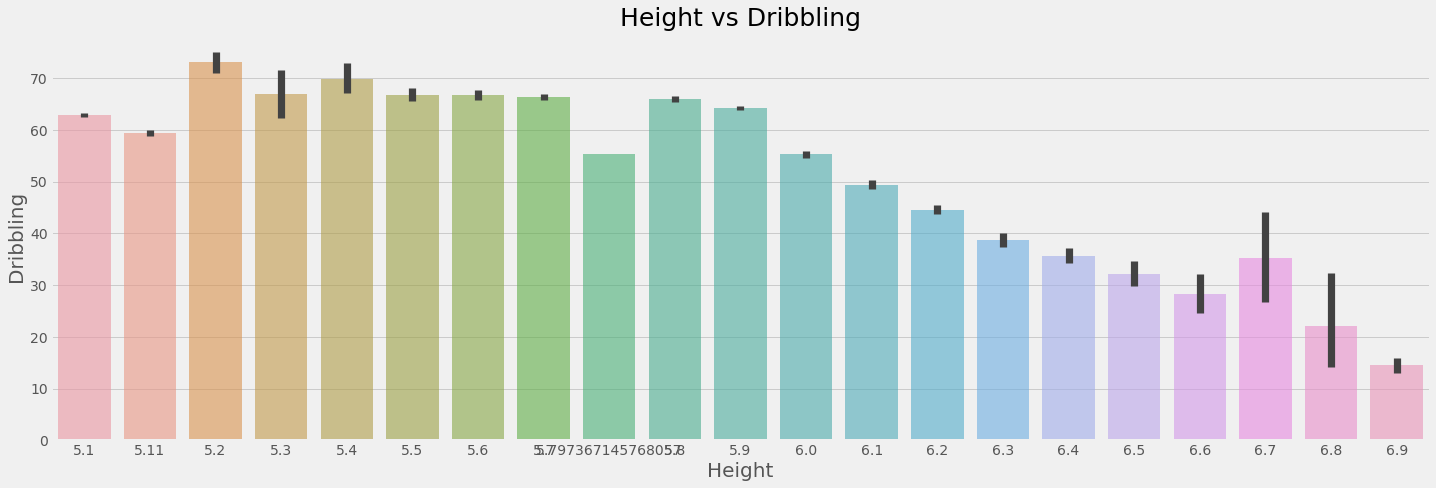

In [55]:
###height vs Dribbling

plt.figure(figsize = (22, 7))
plt.xlabel('Height', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Height vs Dribbling', fontsize = 25)
sns.barplot(x='Height', y='Dribbling', data=df.sort_values('Height', inplace=False), alpha=0.6)

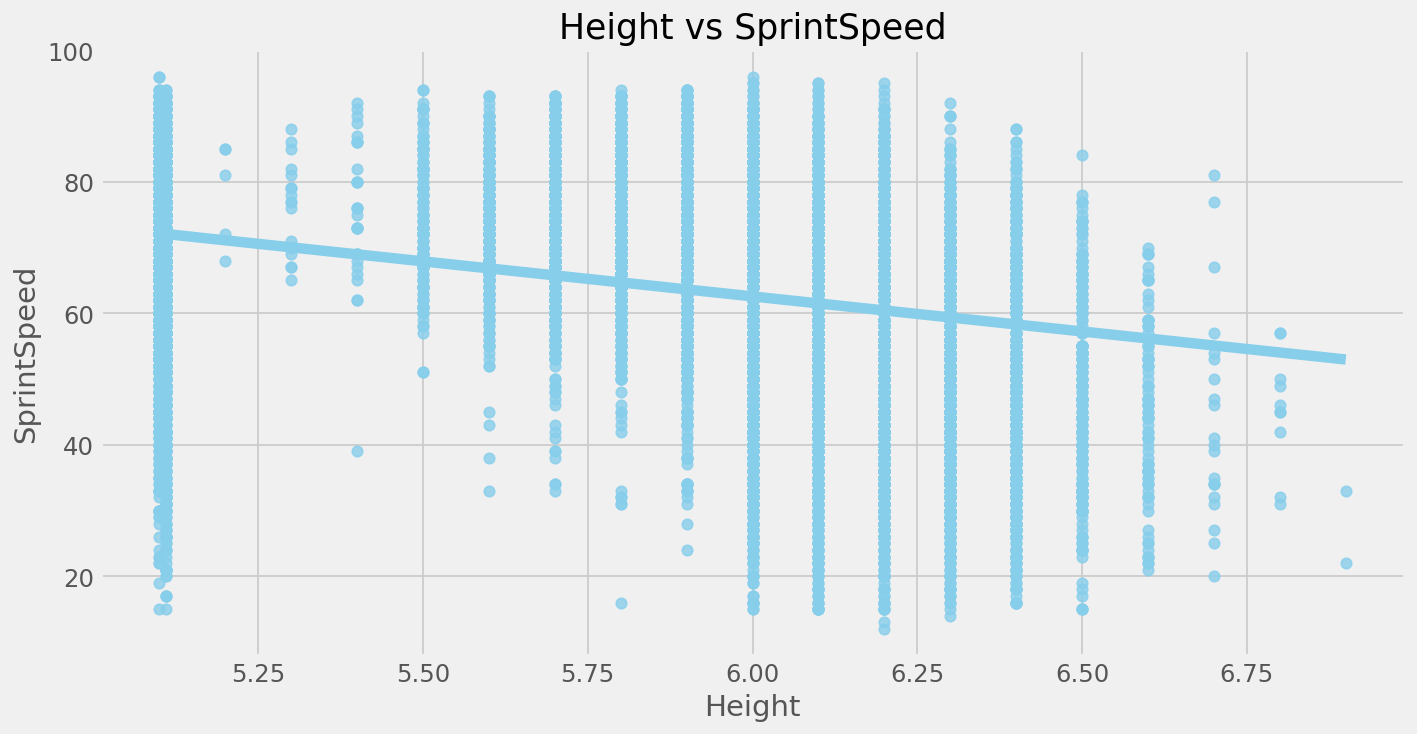

In [56]:
###Height vs SprintSpeed

plt.figure(figsize=(12,6),dpi=125)
x=df['Height']
y=df['SprintSpeed']

sns.regplot(x,y,color='skyblue')
plt.title('Height vs SprintSpeed',fontsize=20)
plt.xlabel('Height')
plt.ylabel('SprintSpeed')
plt.show()

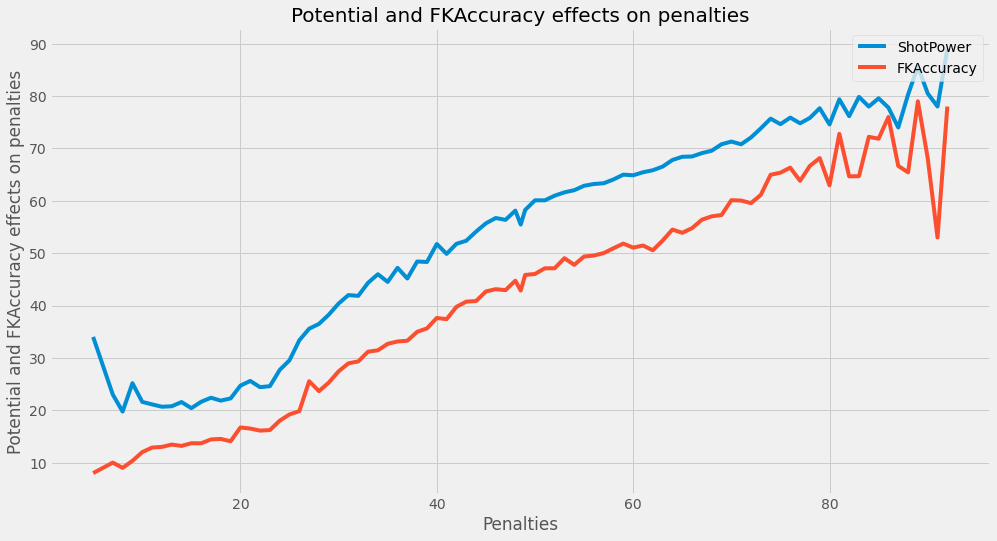

In [57]:
###Potential and FKAccuracy effects on penalties
p = sns.lineplot(x = 'Penalties', y = 'ShotPower', ci = None, data = df, label = 'ShotPower')
p = sns.lineplot(x = 'Penalties', y = 'FKAccuracy', ci = None, data = df, label = 'FKAccuracy')
p = plt.ylabel('Potential and FKAccuracy effects on penalties')
plt.title('Potential and FKAccuracy effects on penalties', fontsize = 20)
p = plt.legend(loc = 1)

<AxesSubplot:title={'center':'weight effects on Stamina SprintSpeed Dribbling'}, xlabel='Weight', ylabel='Stamina'>

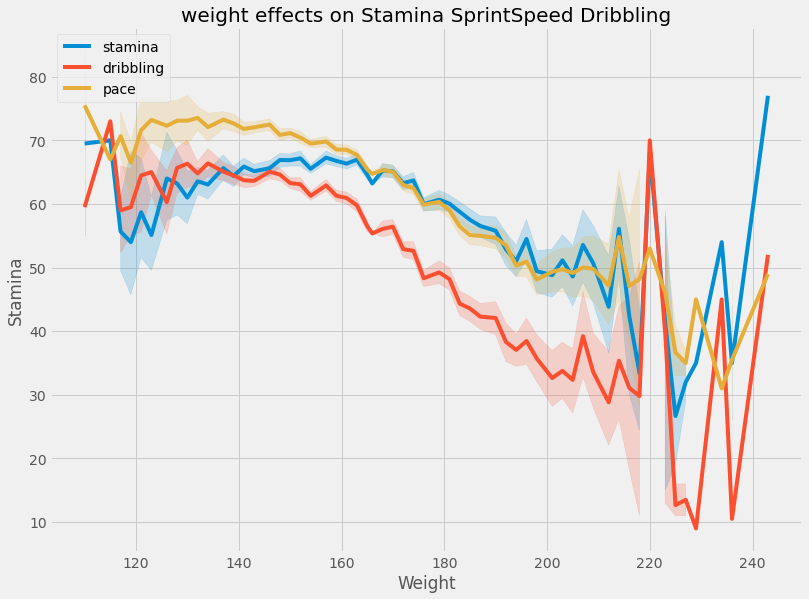

In [58]:
###Weight effects on Stamina SprintSpeed Dribbling

fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.title('weight effects on Stamina SprintSpeed Dribbling', fontsize = 20)

sns.lineplot(x='Weight', y='Stamina', data=df, legend='brief', label='stamina')
sns.lineplot(x='Weight', y='Dribbling', data=df, legend='brief', label='dribbling')
sns.lineplot(x='Weight', y='SprintSpeed', data=df, legend='brief', label='pace')


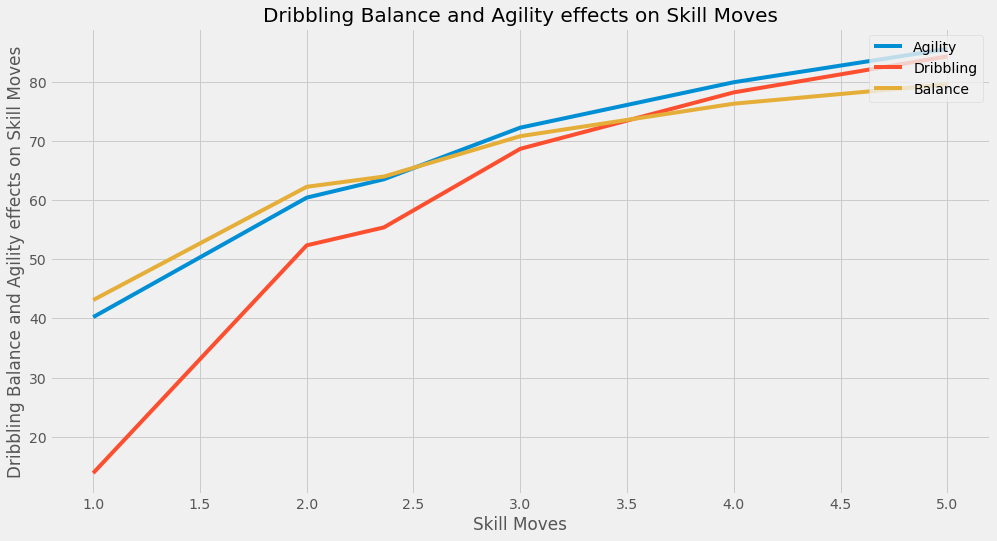

In [59]:
###Dribbling Balance and Agility effects on Skill Moves
p = sns.lineplot(x = 'Skill Moves', y = 'Agility', ci = None, data = df, label = 'Agility')
p = sns.lineplot(x = 'Skill Moves', y = 'Dribbling', ci = None, data = df, label = 'Dribbling')
p = sns.lineplot(x = 'Skill Moves', y = 'Balance', ci = None, data = df, label = 'Balance')
plt.title('Dribbling Balance and Agility effects on Skill Moves', fontsize = 20)

p = plt.ylabel('Dribbling Balance and Agility effects on Skill Moves')
p = plt.legend(loc = 1)
  

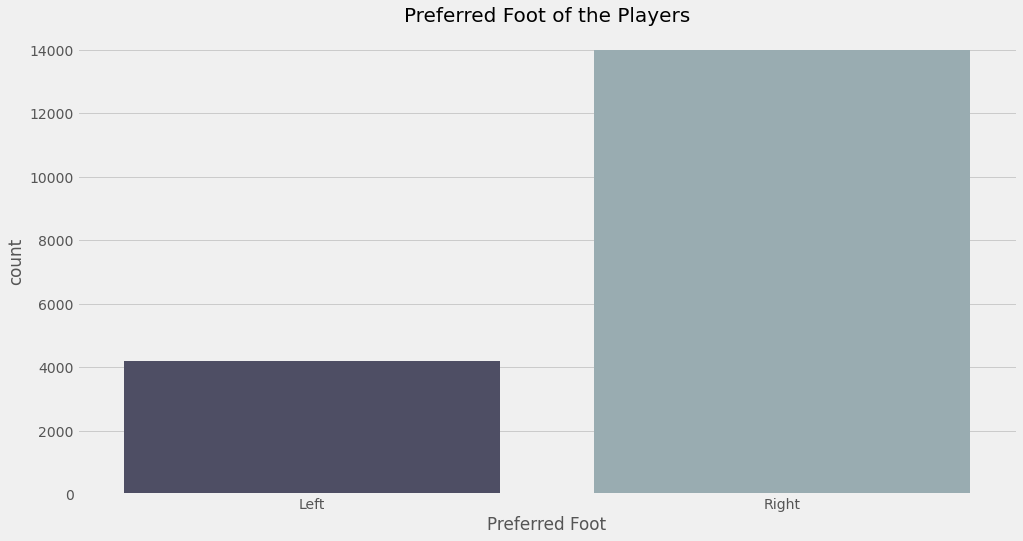

In [60]:
###plt.figure(figsize=(8,6))
sns.countplot(df['Preferred Foot'], palette = 'bone')
plt.title('Preferred Foot of the Players', fontsize = 20)
plt.show()

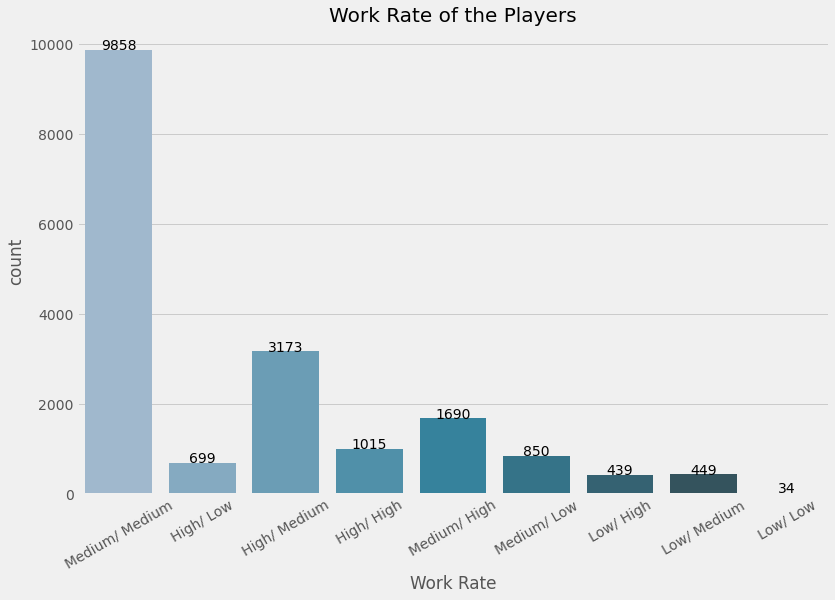

In [61]:
###Work Rate of the Players
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Work Rate'], data=df, palette = 'PuBuGn_d')
graph.set_title('Work Rate of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

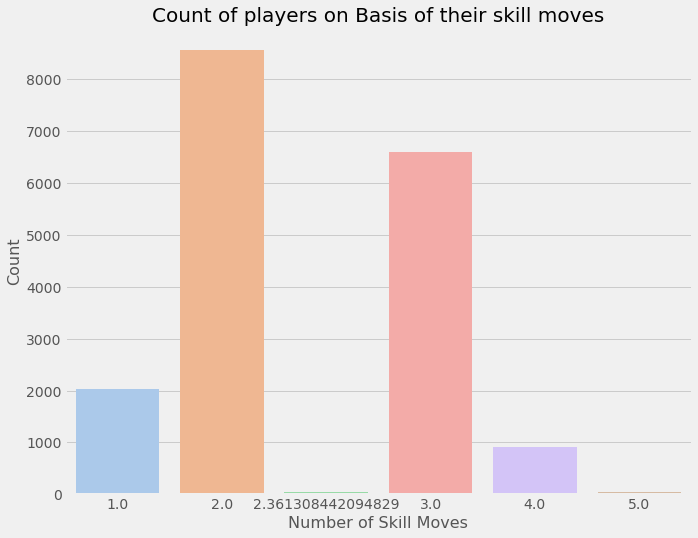

In [62]:
# Skill Moves of Players

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'Skill Moves', data = df, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

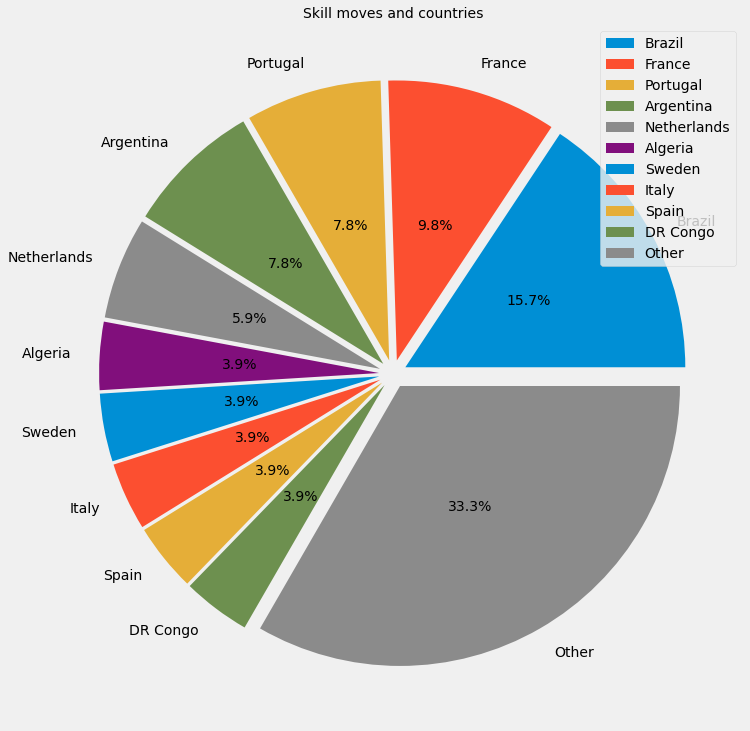

In [63]:
###Skill moves and countries
skillers = df[(df["Skill Moves"] == 5)]
skiller_nations = skillers["Nationality"].value_counts(normalize=True)
rest = skiller_nations[10:].sum()
skiller_nations = skiller_nations[:10]
skiller_nations["Other"] = rest
pie, ax = plt.subplots(figsize=[12,12])
labels = skiller_nations.keys()
plt.pie(x=skiller_nations, autopct="%.1f%%", labels=labels, pctdistance=0.5, explode=[0.05]*11)
plt.legend(loc="upper right")
plt.title("Skill moves and countries", fontsize=14);

In [64]:
#overall Rating wage value and money related data analysis 

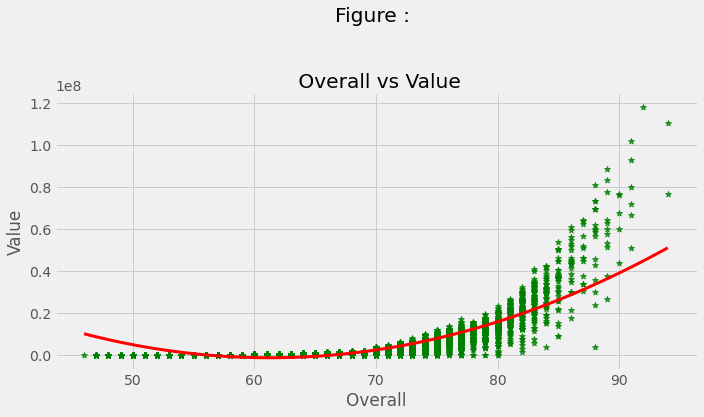

In [65]:
###Overall Rating vs Value
sns.lmplot(x="Overall", y="Value",data=df,markers="*",
           order=2, ci=None, scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Overall vs Value");

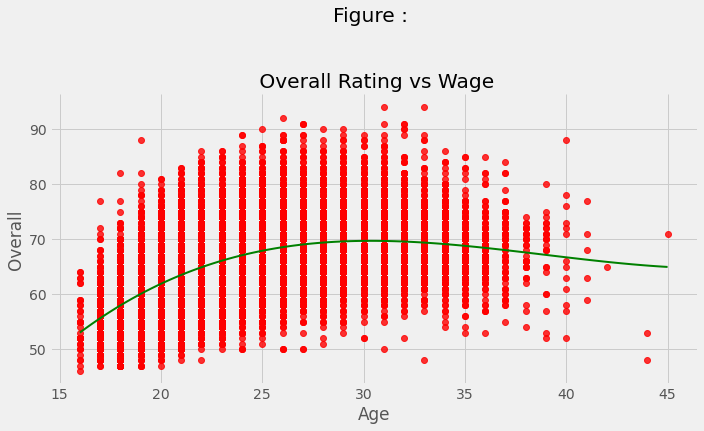

In [66]:
###Overall Rating vs Wage
sns.lmplot(x="Age", y="Overall",data=df,markers="o",
           order=3, ci=None, scatter_kws={"color": "red"},
         line_kws={"linewidth":2,"color":"green"},aspect=2);

plt.title("Figure : \n\n\n Overall Rating vs Wage");

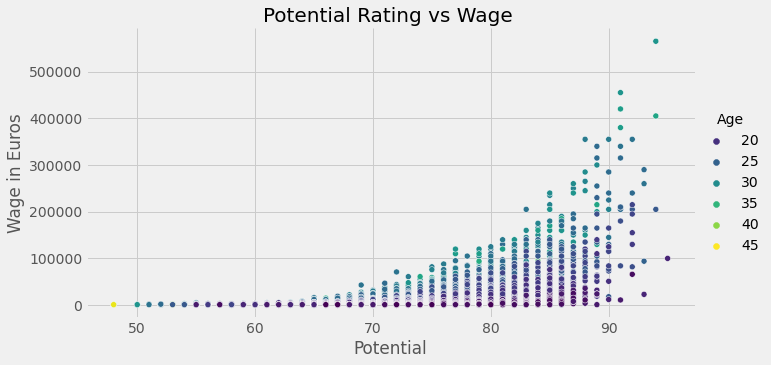

In [67]:
###Potential Rating vs Wage in Euros
sns.relplot(x='Potential',y='Wage',hue='Age',palette = 'viridis', sizes=(15, 200),aspect=2,data=df)
plt.title('Potential Rating vs Wage ',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Wage in Euros')
plt.show()

Text(0.5, 1.0, 'Top 10 most paid players')

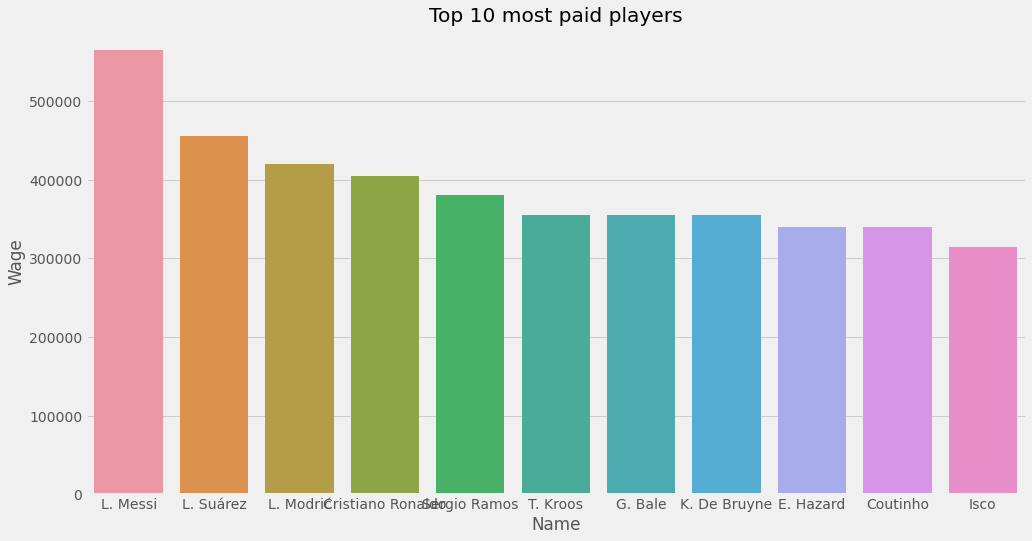

In [68]:
# Top 10 most highly paid players
top_paid_player = df[['Name','Wage']].sort_values(by = 'Wage', ascending = False)[:11]
top_paid_player
plt.figure(figsize=(15,8))
sns.barplot(x = top_paid_player['Name'], y = top_paid_player['Wage'], data = top_paid_player)
plt.title('Top 10 most paid players')

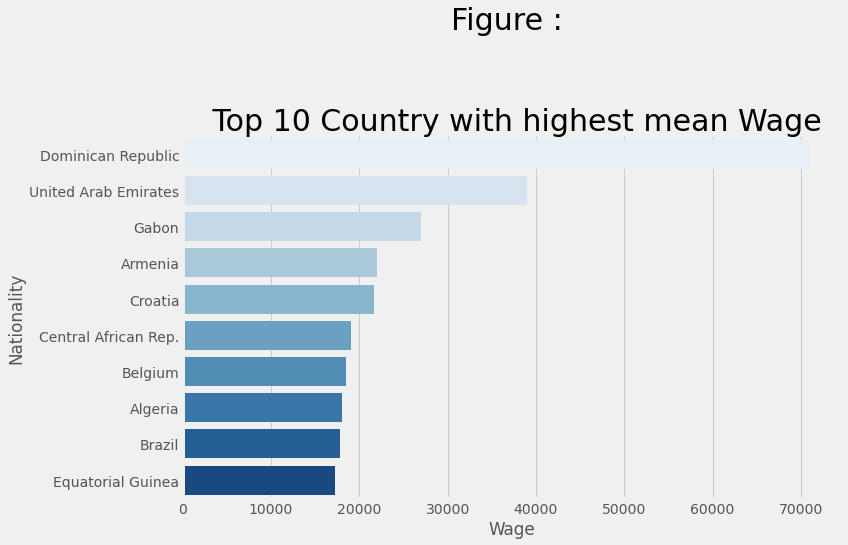

In [69]:
###Top 10 Country with highest mean Wage
avgwageoverall = df.groupby("Nationality", as_index=False)["Wage"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
top10bywage = avgwageoverall.iloc[0:10,:]
sns.catplot(y="Nationality",
            x="Wage",data=top10bywage,
            palette="Blues",height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Wage",
          fontsize=30);

In [70]:
#TEAM ANALYSIS chelsea

In [71]:
### function to define a club
def club(x):
    return df[df['Club']==x][['Name', 'Position','Overall','Potential','Nationality','Age','Value','Wage','Contract Valid Until']]

In [72]:
### applying the function on a specfic team
chelsea= club('Chelsea')


In [73]:
### shape of the team
r,c = chelsea.shape

print('Current Squad Strengtnumber of chelsea is ', r)


Current Squad Strengtnumber of chelsea is  33


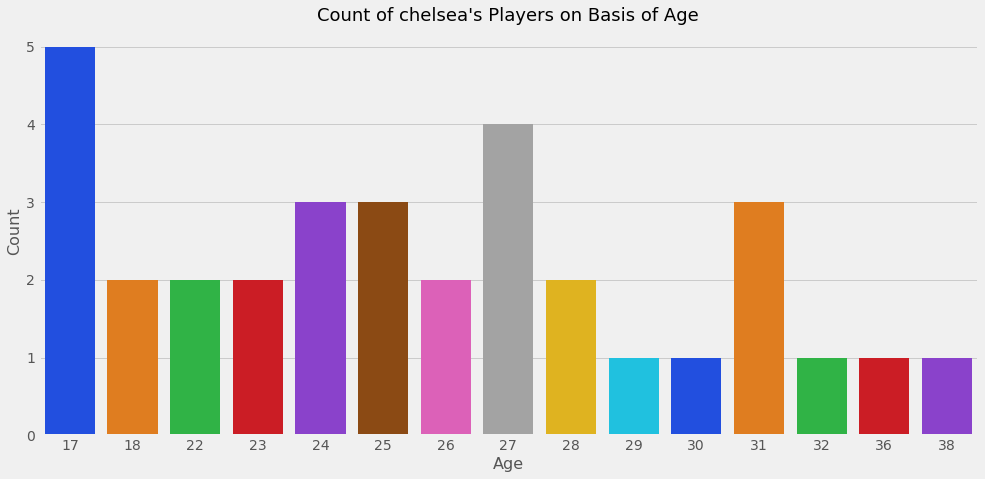

In [74]:
###chelsea\'s Players on Basis of Age
plt.figure(figsize= (15,7))

ax = sns.countplot(x='Age', data=chelsea, palette='bright')
ax.set_title(label='Count of chelsea\'s Players on Basis of Age', fontsize=18)

ax.set_xlabel(xlabel='Age', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)

plt.show()

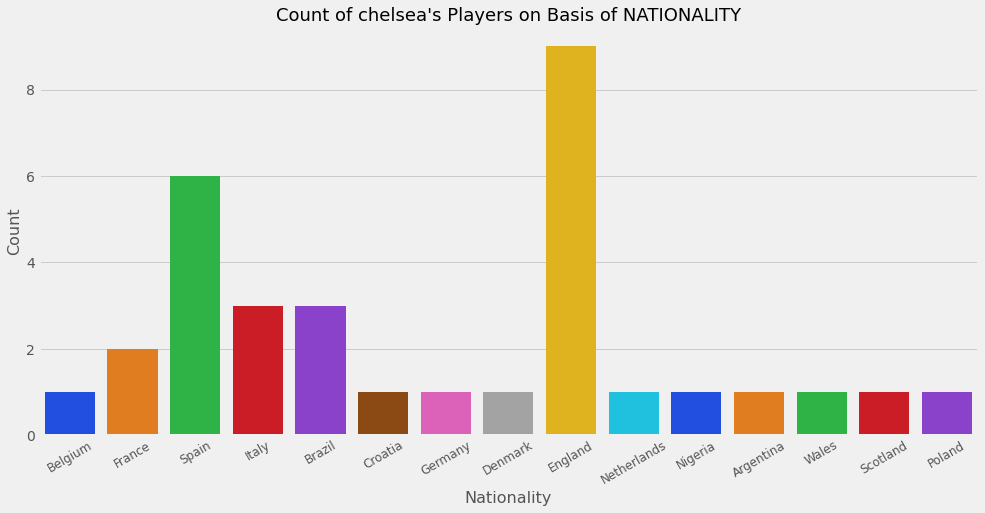

In [75]:
### chelsea\'s Players on Basis of NATIONALITY
plt.figure(figsize= (15,7))

ax = sns.countplot(x='Nationality', data=chelsea, palette='bright')
ax.set_title(label='Count of chelsea\'s Players on Basis of NATIONALITY', fontsize=18)

ax.set_xlabel(xlabel='Nationality', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

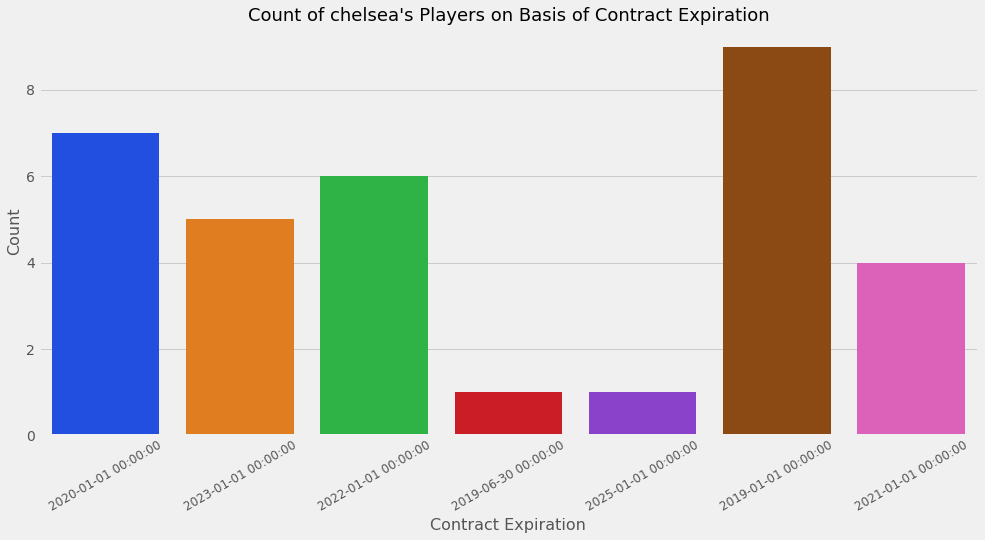

In [76]:
### chelsea\'s Players on Basis of NATIONALITY

plt.figure(figsize= (15,7))

ax = sns.countplot(x='Contract Valid Until', data=chelsea, palette='bright')
ax.set_title(label='Count of chelsea\'s Players on Basis of Contract Expiration', fontsize=18)

ax.set_xlabel(xlabel='Contract Expiration', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()


In [77]:
### OVR of chelsea\'s Players

tempdf = chelsea.sort_values(by='Overall')
fig = px.bar(tempdf, x='Name', y='Overall', color='Overall')

fig['layout']['yaxis1'].update(title='', range=[50, 100], dtick=5, autorange=False)


fig.update_layout(title='OVR of chelsea\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="OVR")

py.iplot(fig)


In [78]:
### Potential of chelsea\'s Players

tempdf = chelsea.sort_values(by='Potential')
fig = px.bar(tempdf, x='Name', y='Potential', color='Potential')

fig['layout']['yaxis1'].update(title='', range=[50,100], dtick=5, autorange=False)


fig.update_layout(title='Potential of chelsea\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title=" potential")

py.iplot(fig)

In [79]:
###Weekly wages of chelsea\'s Players
tempdf = chelsea.sort_values(by='Wage')
fig = px.bar(tempdf, x='Name', y='Wage', color='Wage')

fig.update_layout(title='Weekly wages of chelsea\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="Wage in Euro")

py.iplot(fig)

In [80]:
###Values of chelsea\'s Players

tempdf = chelsea.sort_values(by='Value')
fig = px.bar(tempdf, x='Name', y='Value', color='Value')

fig.update_layout(title='Values of chelsea\'s Players',
                 xaxis_title="Player's Name",
                 yaxis_title="value in Euro")

py.iplot(fig)